# 寫入 dataframe 到 sqlite 中

In [1]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [3]:
start = '2015-01-01'
end = '2018-12-31'
df = pdr.get_data_yahoo("TSLA",start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
import sqlite3

In [5]:
conn = sqlite3.connect("test.db")

In [6]:
df.to_sql('TSLA', conn, if_exists='append')

1005

In [7]:
df = pd.read_sql('select * from TSLA', conn, parse_dates=['Date'])

In [8]:
df.sort_values('Date').head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [9]:
df = df.set_index('Date')

In [10]:
df.sort_index().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [11]:
df.drop_duplicates()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
...,...,...,...,...,...,...
2018-12-21,21.160000,21.564667,20.829332,21.318001,21.318001,120252000
2018-12-24,20.900000,20.966667,19.680000,19.692667,19.692667,83398500
2018-12-26,20.000000,21.798000,19.606001,21.739332,21.739332,122446500


<Axes: xlabel='Date'>

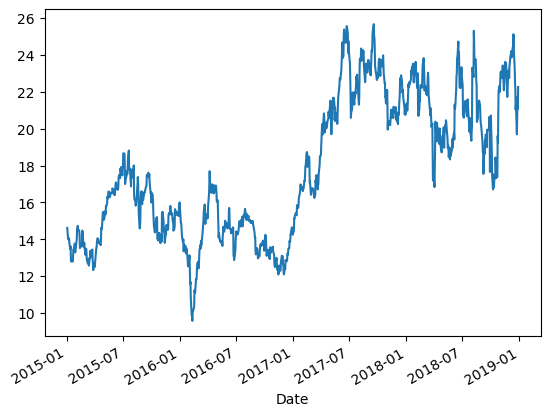

In [12]:
%matplotlib inline
symbol = list(df.keys())
df['Close'].plot()